In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import sklearn.linear_model as lin

In [2]:
conn = sqlite3.connect('db.db')
cur = conn.cursor()

In [5]:
#Task 1. Retrieving and calculating ARPPU
cur.execute('''
SELECT MAX(ts), unique_purchases, app_revenue
FROM payments
WHERE os = 'android' AND app_revenue > 0
GROUP BY date, country, os;
''')

row = cur.fetchone()
and_user = 0
and_rev = 0
while row != None:
    and_user += row[1]
    and_rev += row[2]
    row = cur.fetchone()
and_ARPPU = and_rev/and_user #android
    
cur.execute('''
SELECT MAX(ts), unique_purchases, app_revenue
FROM payments
WHERE os = 'ios' AND app_revenue > 0
GROUP BY date, country, os;
''')

row = cur.fetchone()
ios_user = 0
ios_rev = 0
while row != None:
    ios_user += row[1]
    ios_rev += row[2]
    row = cur.fetchone()

ios_ARPPU = ios_rev/ios_user #ios
print('Android ARPPU:', and_ARPPU, '\nIOS ARPPU:',ios_ARPPU)

Android ARPPU: 17.85672076666667 
IOS ARPPU: 28.633771185941026


In [6]:
#Task 1. Writing to res1.txt
fname = 'res1.txt'
fhand = open(fname, 'w')
str = '%f %f' % (and_ARPPU, ios_ARPPU)
fhand.write(str)
fhand.close()

In [7]:
#Task 2. ROAS calculation
cur.execute('''
SELECT SUM(app_revenue), SUM(spend)
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.os = 'android' AND payments.date LIKE '2020-06%' AND ts LIKE (DATE(payments.date, '+28 days')||'%')
ORDER BY payments.date;
''')

rev, spend = cur.fetchone()
and_jun_roas_28d = rev/spend #android june
print('28 day ROAS for Android in June:', and_jun_roas_28d, ', spend:', spend, ', revenue:', rev)

cur.execute('''
SELECT SUM(app_revenue), SUM(spend)
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.os = 'android' AND payments.date LIKE '2020-07%' AND ts LIKE (DATE(payments.date, '+28 days')||'%')
ORDER BY payments.date;
''')

rev1, spend1 = cur.fetchone()
and_jul_roas_28d = rev1/spend1 #android july
print('28 day ROAS for Android in July:', and_jul_roas_28d,', spend:', spend1,', revenue:', rev1)

cur.execute('''
SELECT SUM(app_revenue), SUM(spend)
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.os = 'ios' AND payments.date LIKE '2020-06%' AND ts LIKE (DATE(payments.date, '+28 days')||'%')
ORDER BY payments.date;
''')

rev, spend = cur.fetchone()
ios_jun_roas_28d = rev/spend #ios june
print('28 day ROAS for iOS in June:', ios_jun_roas_28d,', spend:', spend,', revenue:', rev)

cur.execute('''
SELECT SUM(app_revenue), SUM(spend)
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.os = 'ios' AND payments.date LIKE '2020-07%' AND ts LIKE (DATE(payments.date, '+28 days')||'%')
ORDER BY payments.date;
''')

rev2, spend2 = cur.fetchone()
ios_jul_roas_28d = rev2/spend2 #ios july
print('28 day ROAS for iOS in July:', ios_jul_roas_28d,', spend:', spend2, ', revenue:', rev2)

28 day ROAS for Android in June: 0.8870121075097362 , spend: 24133.100396 , revenue: 21406.352243000012
28 day ROAS for Android in July: 0.6535773640044662 , spend: 4074.3476850000006 , revenue: 2662.9014199999997
28 day ROAS for iOS in June: 0.840017090886012 , spend: 28506.959770000027 , revenue: 23946.333415999998
28 day ROAS for iOS in July: 1.187854000350659 , spend: 6216.830000000008 , revenue: 7384.686384999997


In [8]:
#Task 2. Growth rate and writing to res2.txt
and_roas_rate = (and_jul_roas_28d - and_jun_roas_28d)/and_jun_roas_28d
ios_roas_rate = (ios_jul_roas_28d - ios_jun_roas_28d)/ios_jun_roas_28d
print('Android ROAS rate:', and_roas_rate, '\niOS ROAS rate:', ios_roas_rate)

fname = 'res2.txt'
fhand = open(fname, 'w')
str = '%f %f' % (and_roas_rate, ios_roas_rate)
fhand.write(str)
fhand.close()

Android ROAS rate: -0.26316973751421735 
iOS ROAS rate: 0.41408313382977063


2630
[737577. 737577. 737577. ... 737601. 737601. 737601.]


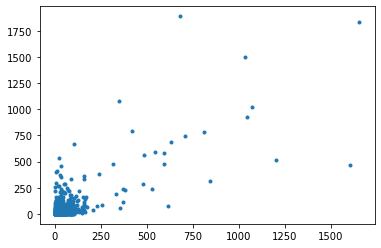

In [10]:
#Task 2.1. June plots, just for exploration

cur.execute('''
SELECT payments.date, app_revenue, spend
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.date LIKE '2020-06%' AND ts LIKE (DATE(payments.date, '+28 days')||'%')
ORDER BY payments.date;
''')

row = cur.fetchone()
junDate = []
junRev = []
junSpend = []
while row != None:
    junDate.append(row[0])
    junRev.append(row[1])
    junSpend.append(row[2])
    row = cur.fetchone()
print(len(junRev))

junDate = dates.datestr2num(junDate, default=None)
print(junDate)

plt.plot(junSpend, junRev, '.')
#The plot is quite linear. Plot for platfroms separately (not shown) is even more linear

3236
2020-06-01


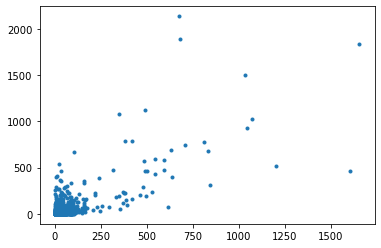

In [11]:
#Task 2.1. June and July plots, just for exploration
cur.execute('''
SELECT payments.date, app_revenue, spend
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE ts LIKE (DATE(payments.date, '+28 days')||'%')
ORDER BY payments.date;
''')

row = cur.fetchone()
Date = []
Rev = []
Spend = []
while row != None:
    Date.append(row[0])
    Rev.append(row[1])
    Spend.append(row[2])
    row = cur.fetchone()
print(len(Rev))

junDate = dates.datestr2num(Date, default=None)

plt.plot(Spend, Rev, '.')
#Also linear, can use it

35
(35, 4)
(13, 4)


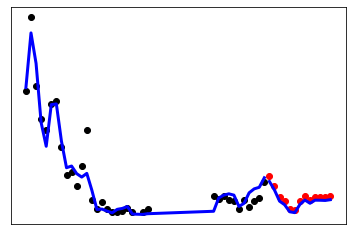

28 day ROAS prediction for Android in July: 0.7013760398152779 
Spend: 7665.927685000001 
Revenue: 5376.698001215601


In [12]:
# 2.1 android prediction
cur.execute('''
SELECT payments.date, SUM(app_revenue), SUM(spend), SUM(impressions), SUM(clicks), SUM(installs)
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.os = 'android' AND ts LIKE (DATE(payments.date, '+28 days')||'%')
GROUP BY payments.date
ORDER BY payments.date;
''')

row = cur.fetchone()
sumDate = []
sumRev = []
sumSpend = []
sumImpr = []
sumClk = []
sumInst = []
while row != None:
    sumDate.append(row[0])
    sumRev.append(row[1])
    sumSpend.append(row[2])
    sumImpr.append(row[3])
    sumClk.append(row[4])
    sumInst.append(row[5])
    row = cur.fetchone()
print(len(sumRev))

sumDate = dates.datestr2num(sumDate, default=None)

X = np.array([sumSpend, sumImpr, sumClk, sumInst])
X = X.transpose()
print(X.shape)
model1 = lin.LinearRegression()
model1.fit(X, sumRev)

cur.execute('''
SELECT date, SUM(spend), SUM(impressions), SUM(clicks), SUM(installs)
FROM spent
WHERE os = 'android' AND DATE(date) > DATE('2020-07-18' ) AND date LIKE '2020-07%'
GROUP BY date
ORDER BY date;
''')

row = cur.fetchone()
date_test = []
spend_test = []
impr_test = []
clk_test = []
inst_test = []
while row != None:
    date_test.append(row[0])
    spend_test.append(row[1])
    impr_test.append(row[2])
    clk_test.append(row[3])
    inst_test.append(row[4])
    row = cur.fetchone()
date_test = dates.datestr2num(date_test, default=None)
X_test = np.array([spend_test, impr_test, clk_test, inst_test])
X_test = X_test.transpose()
print(X_test.shape)

y_pred = model1.predict(X)
y_test_pred = model1.predict(X_test)

#shown on as a time series
plt.scatter(sumDate, sumRev,  color='black')
plt.scatter(date_test, spend_test,  color='red') #expenditures are in red
plt.plot(sumDate, y_pred, color='blue', linewidth=3)
plt.plot(date_test, y_test_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

jul_and_rev = rev1+sum(y_test_pred)
jul_and_spend = spend1+sum(spend_test)
and_jul_roas_28d_pred = jul_and_rev/jul_and_spend
print('28 day ROAS prediction for Android in July:', and_jul_roas_28d_pred, '\nSpend:', jul_and_spend,'\nRevenue:', jul_and_rev)
# android roas prediction is 0.701

33
[737577. 737578. 737579. 737580. 737581. 737582. 737583. 737584. 737585.
 737586. 737587. 737588. 737589. 737590. 737591. 737592. 737593. 737594.
 737595. 737596. 737597. 737598. 737614. 737615. 737616. 737617. 737618.
 737619. 737620. 737621. 737622. 737623. 737624.]
(13, 4)


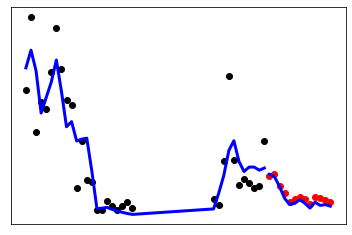

28 day ROAS prediction for iOS in July: 1.0406467191422162 
Spend: 9623.320051000008 
Revenue: 10014.476438328662


In [13]:
# 2.1. IOS prediction
cur.execute('''
SELECT payments.date, SUM(app_revenue), SUM(spend), SUM(impressions), SUM(clicks), SUM(installs)
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.os = 'ios' AND ts LIKE (DATE(payments.date, '+28 days')||'%')
GROUP BY payments.date
ORDER BY payments.date;
''')

row = cur.fetchone()
sumDate = []
sumRev = []
sumSpend = []
sumImpr = []
sumClk = []
sumInst = []
while row != None:
    sumDate.append(row[0])
    sumRev.append(row[1])
    sumSpend.append(row[2])
    sumImpr.append(row[3])
    sumClk.append(row[4])
    sumInst.append(row[5])
    row = cur.fetchone()
print(len(sumRev))

sumDate = dates.datestr2num(sumDate, default=None)
print(sumDate)

X = np.array([sumSpend, sumImpr, sumClk, sumInst])
X = X.transpose()
model2 = lin.LinearRegression()
model2.fit(X, sumRev)

cur.execute('''
SELECT date, SUM(spend), SUM(impressions), SUM(clicks), SUM(installs) 
FROM spent
WHERE os = 'ios' AND DATE(date) > DATE('2020-07-18' ) AND date LIKE '2020-07%'
GROUP BY date
ORDER BY date;
''')

row = cur.fetchone()
date_test = []
spend_test = []
impr_test = []
clk_test = []
inst_test = []
while row != None:
    date_test.append(row[0])
    spend_test.append(row[1])
    impr_test.append(row[2])
    clk_test.append(row[3])
    inst_test.append(row[4])
    row = cur.fetchone()
date_test = dates.datestr2num(date_test, default=None)
X_test = np.array([spend_test, impr_test, clk_test, inst_test])
X_test = X_test.transpose()
print(X_test.shape)

y_pred = model2.predict(X)
y_test_pred = model2.predict(X_test)

#shown on as a time series
plt.scatter(sumDate, sumRev,  color='black')
plt.scatter(date_test, spend_test,  color='red') #expenditures are in red
plt.plot(sumDate, y_pred, color='blue', linewidth=3)
plt.plot(date_test, y_test_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

jul_ios_rev = rev2+sum(y_test_pred)
jul_ios_spend = spend2+sum(spend_test)
ios_jul_roas_28d_pred = jul_ios_rev/jul_ios_spend
print('28 day ROAS prediction for iOS in July:', ios_jul_roas_28d_pred, '\nSpend:', jul_ios_spend, '\nRevenue:', jul_ios_rev)
# ios roas prediction is 1.041

### Задание 3.
Представьте, что сегодня 2020-08-16 и вам нужно дать рекомендации отделу по закупке трафика.
Проанализировав данные, скажите:
* какая динамика наблюдается в целом? (рекомендуем построить воронку конверсий от impression до конверсии в покупку)
* какие сегменты имеют хорошие показатели и могут масштабироваться;
* какие сегменты находятся в серой зоне и **что можно сделать** для улучшения их перфоманса;
* какие сегменты скорее всего безнадежны и на них не стоит тратить бюджеты.

Исходите из предположения о том, что норма roas_28d = 1.2

In [18]:
# Task 3.
cur.execute('''
SELECT payments.date, SUM(unique_purchases), SUM(app_revenue), SUM(spend), SUM(impressions), SUM(clicks), SUM(installs)
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.date LIKE '2020-06%' AND ts LIKE (DATE(payments.date, '+28 days')||'%');
''')

row = cur.fetchone()
jun_spend = row[3]
jun_impr = row[4]
jun_clk = row[5]
jun_inst = row[6]
print('Jun info: spend - ', jun_spend, ', impressions - ', jun_impr, ', clicks - ',  jun_clk, ', installs - ',  jun_inst)

cur.execute('''
SELECT payments.date, SUM(unique_purchases), SUM(app_revenue), SUM(spend), SUM(impressions), SUM(clicks), SUM(installs)
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.date LIKE '2020-07%' AND ts LIKE (DATE(payments.date, '+28 days')||'%');
''')

row = cur.fetchone()
jul_spend = row[3]
jul_impr = row[4]
jul_clk = row[5]
jul_inst = row[6]
print('Jul info: spend - ', jul_spend, ', impressions - ', jul_impr, ', clicks - ', jul_clk, ', installs - ', jul_inst)

Jun info: spend -  52640.06016600002 , impressions -  13416361 , clicks -  232508 , installs -  78326
Jul info: spend -  10291.177685000013 , impressions -  1144691 , clicks -  18664 , installs -  6550


In [171]:
cur.execute('''
SELECT spent.date, SUM(impressions), SUM(clicks), SUM(installs), SUM(purchases), SUM(unique_purchases) 
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.date LIKE '2020-06%' AND ts LIKE (DATE(payments.date, '+28 days')||'%')
UNION ALL
SELECT spent.date, SUM(impressions), SUM(clicks), SUM(installs), SUM(purchases), SUM(unique_purchases) 
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.date LIKE '2020-07%' AND ts LIKE (DATE(payments.date, '+28 days')||'%')
UNION ALL
SELECT date, SUM(impressions), SUM(clicks), SUM(installs), 0 as placeholder, 0 as placeholder
FROM spent
WHERE date LIKE '2020-08%';
''')

row = cur.fetchone()
impr, clk, inst, purch, upurch = [], [], [], [], []
while row != None:
    impr.append(row[1])
    clk.append(row[2])
    inst.append(row[3])
    purch.append(row[4])
    upurch.append(row[5])
    row = cur.fetchone()

In [173]:
i=0
conv_itoc, conv_ctoin, conv_intop, conv_intoup = [],[],[], []
for i in range(3):
    conv_itoc.append(clk[i]/impr[i]) 
    conv_ctoin.append(inst[i]/clk[i])
    conv_intop.append(purch[i]/inst[i])
    conv_intoup.append(upurch[i]/inst[i])
print(conv_itoc)

[0.017330183646668423, 0.016304836851167695, 0.01773533190675937]


In [211]:
print('Impressions to clicks (itoc): ', conv_itoc, '\nClicks to installs (ctoin): ', conv_ctoin, '\nInstalls to purchases (intop): ', conv_intop, '\nInstalls to Unique purchases (intoup): ', conv_intoup)

Impressions to clicks (itoc):  [0.017330183646668423, 0.016304836851167695, 0.01773533190675937] 
Clicks to installs (ctoin):  [0.3368744301271354, 0.35094299185597944, 0.2694065396498455] 
Installs to purchases (intop):  [0.1656538058882108, 0.3596946564885496, 0.0] 
Installs to Unique purchases (intoup):  [0.02720680233894237, 0.05099236641221374, 0.0]


* какая динамика наблюдается в целом? (рекомендуем построить воронку конверсий от impression до конверсии в покупку)

В целом кампания в июне имела низкие показатели ROAS по обоим платформам. В июле ожидается ухудшение по платформе андроид, в то время как затраты на ios могут оказаться прибыльными, однако ROAS по прежнему не в предпочтительном районе (ниже 1.2). Наблюдается достаточно низкая конверсия из просмотра в клики (ниже 2% процентов). Также эта конверсия незначительно упала в июле по сравнению с июнем, но исправляется в августе. Требуется исправить таргетинг, например сделав контент более интересным для потенциальных пользователей или лучше определять целевую аудиторию для показа. Конверсия кликов в установки достаточно высокая (около 30%) - улучшилась в июле по сравнению с июнем. Однако в августе пока заметен спад этого показателя. Конверсия из пользователей и в уникальных покупателей, и в покупки в целом также хорошая. По крайней мере показатели в июле по сравнению с июнем улучшились почти в два раза. Маркетологам можно проанализировать чем вызван такой приток и попытаться развиваться в данном направлении.

Определим сегмент как уникальную комбинацию страны и платформы. Сегмент не будет равняться когорте так как когорта также учитывает дату установки. Для начала определим интересующие нас сегменты. В июне присутствует много стран, которые отсутствуют в июле. Их рассматривать не будем.

In [15]:
cur.execute('''
SELECT payments.country, payments.os
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.date LIKE '2020-06%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
GROUP BY payments.country, payments.os
''')

table1 = cur.fetchall()
print('Количество комбинаций сегментов, у которых есть 28 дней ts в июне', len(table1))

cur.execute('''
SELECT payments.country, payments.os
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
GROUP BY payments.country, payments.os
''')

table1 = cur.fetchall()
print('Количество комбинаций сегментов, у которых есть 28 дней ts в июле', len(table1))

cur.execute('''
SELECT payments.country||' '||payments.os
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
INNER JOIN (
	SELECT payments.country, payments.os
	FROM payments
	INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
	WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
	GROUP BY payments.country, payments.os
) as table2 ON table2.country = payments.country AND table2.os = payments.os
WHERE payments.date LIKE '2020-06%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
GROUP BY payments.country, payments.os;
''')

table1 = cur.fetchall()
print('Количество пересечений в предыдущих двух таблицах:', len(table1))
  

Количество комбинаций сегментов, у которых есть 28 дней ts в июне 302
Количество комбинаций сегментов, у которых есть 28 дней ts в июле 177
Количество пересечений в предыдущих двух таблицах: 174


Как мы видим, 3 сегмента появляются в июле, которые не появлялись в июне. Они приведены в следующей таблице. По отсутствию прибыли и низких затратах мы пока не можем анализировать эти сегменты.

In [16]:
cur.execute('''SELECT payments.country, payments.os, SUM(spend) as July_spend, (SUM(app_revenue)/SUM(spend)) as July_ROAS
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') AND (payments.country||' '||payments.os) NOT IN 
(
	SELECT payments.country||' '||payments.os
	FROM payments
	INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
	INNER JOIN (
		SELECT payments.country, payments.os
		FROM payments
		INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
		WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
		GROUP BY payments.country, payments.os
	) as table2 ON table2.country = payments.country AND table2.os = payments.os
	WHERE payments.date LIKE '2020-06%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
	GROUP BY payments.country, payments.os
)
GROUP BY payments.country, payments.os
ORDER BY July_spend DESC;
''')

table1 = cur.fetchall()
pd.DataFrame(table1, columns = ['Country', 'OS', 'Spend', 'ROAS_28d'])

,Country,OS,Spend,ROAS_28d
0,KG,ios,0.06,0.0
1,ME,ios,0.04,0.0
2,GQ,android,0.01,0.0


Ниже приведена таблица с затратами на месяц и ROAS_28d по этому месяцу для каждого месяца отобранных сегментов.

In [17]:
cur.execute('''
SELECT payments.country, payments.os, SUM(spend) as June_spend, July_spend, (SUM(app_revenue)/SUM(spend)) as June_ROAS, July_ROAS
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
INNER JOIN (
	SELECT payments.country, payments.os, SUM(spend) as July_spend, (SUM(app_revenue)/SUM(spend)) as July_ROAS
	FROM payments
	INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
	WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
	GROUP BY payments.country, payments.os
	ORDER BY payments.country ASC, payments.os ASC
) as table2 ON table2.country = payments.country AND table2.os = payments.os
WHERE payments.date LIKE '2020-06%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
GROUP BY payments.country, payments.os
ORDER BY July_ROAS DESC;
''')

table1 = cur.fetchall()
df_table1 = pd.DataFrame(table1, columns = ['Country', 'OS', 'June_spend', 'July_spend', 'June_ROAS_28d', 'July_ROAS_28d'])
df_table1

,Country,OS,June_spend,July_spend,June_ROAS_28d,July_ROAS_28d
0,CN,ios,0.190000,0.030000,31.238211,1562.000000
1,IL,android,126.210000,0.440000,2.263768,37.345455
2,TR,android,609.947600,7.409410,0.742095,26.682961
3,BE,ios,113.470000,11.630000,3.647820,15.418401
4,EC,ios,82.480000,0.230000,0.120878,12.956522
...,...,...,...,...,...,...
169,UZ,android,1.110000,0.110000,0.000000,0.000000
170,UZ,ios,0.030000,0.310000,0.000000,0.000000
171,VE,android,1.919978,0.060000,0.000000,0.000000
172,VN,ios,52.310000,1.840000,0.089584,0.000000


* какие сегменты имеют хорошие показатели и могут масштабироваться;

Ниже приведена таблица с резултатами того же запроса что и выше, но уже отфильтрованная с помощью 
HAVING (June_ROAS >=1.2 OR July_ROAS >=1.2) AND ((June_spend > July_spend AND June_ROAS > July_ROAS) OR (June_spend < July_spend AND June_ROAS < July_ROAS)).
Дано 25 сегментов, у которых как минимум в одном месяце был ROAS выше 1.2, а также имеющие ROAS выше при затратах выше чем в другом месяце(т.е. имеют хороший показатель и масштабируются). На удивление в целом данные сегменты имели сокращенные затраты в июле и соответственно ниже окупаемость. Для таких сегментов имеет смысл увеличить затраты даже выше июнских.

In [19]:
cur.execute('''
SELECT payments.country, payments.os, SUM(spend) as June_spend, July_spend, (SUM(app_revenue)/SUM(spend)) as June_ROAS, July_ROAS
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
INNER JOIN (
	SELECT payments.country, payments.os, SUM(spend) as July_spend, (SUM(app_revenue)/SUM(spend)) as July_ROAS
	FROM payments
	INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
	WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
	GROUP BY payments.country, payments.os
	ORDER BY payments.country ASC, payments.os ASC
) as table2 ON table2.country = payments.country AND table2.os = payments.os
WHERE payments.date LIKE '2020-06%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
GROUP BY payments.country, payments.os
HAVING (June_ROAS >=1.2 OR July_ROAS >=1.2) AND 
((June_spend > July_spend AND June_ROAS > July_ROAS) OR (June_spend < July_spend AND June_ROAS < July_ROAS)) 
ORDER BY July_ROAS DESC;
''')

table1 = cur.fetchall()
df_table1 = pd.DataFrame(table1, columns = ['Country', 'OS', 'June_spend', 'July_spend', 'June_ROAS_28d', 'July_ROAS_28d'])
df_table1

,Country,OS,June_spend,July_spend,June_ROAS_28d,July_ROAS_28d
0,BR,ios,558.880000,53.150000,1.301789,1.138334
1,TR,ios,598.710000,38.810000,1.297685,0.596926
2,DE,ios,1171.460000,69.150000,1.370654,0.467066
3,AU,ios,420.640000,21.810000,1.385617,0.142999
4,FR,ios,349.740000,62.470000,2.001208,0.126919
5,AE,ios,223.680000,3.870000,2.197599,0.000000
6,AU,android,191.550000,11.850000,2.823124,0.000000
7,AZ,android,4.490000,0.499989,7.732962,0.000000
8,BY,android,33.999760,0.339957,1.856778,0.000000
9,CH,android,405.756600,6.820000,2.619707,0.000000


* какие сегменты находятся в серой зоне и **что можно сделать** для улучшения их перфоманса;

Определим серую зону как сегменты имеющие ROAS между 0.8 и 1.2. Таблица ниже покажет сегменты с ROAS в данном промежутке как минимум в одном из месяцев. Всего по данному запросу было найдено 17 сегментов. Среди них есть сегменты, где ROAS понизился с понижением затрат (10 из 17) и где ROAS выше при меньших затратах (7 из 17; iOS у RU, ZA, CL, и android у NZ). Для первой категории можно попробовать вновь повысить затраты, возможно такие сегменты имеет потенциал к масштабированию. У второй категории можно оставить затраты на том невысоком уровне, при котором они приносят наибольший доход. 

Основной причиной низкого ROAS у сегментов серой зоны в целом является низкая конверсия (ниже средних 1.7%) из impressions в clicks (itoc). Для того чтобы исправить эту проблему можно настроить аудиторию рекламы более точно, или же сделать рекламный контент более привлекательным для нынешней аудитории, пробовать другие площадки для продвижения.

IOS сегменты у CZ, BR и MX, помимо низкой конверсии из impressions в clicks (itoc), также имеют конверсию из clicks в installs (ctoin) ниже среднего (20-30%). Для увеличения этого показателя можно сделать страницу установки более привлекательной: изменить фото, добавить отзывы, повысить рейтинг и т.д.

In [20]:
cur.execute('''
SELECT payments.country, payments.os, SUM(spend) as June_spend, July_spend, round(SUM(app_revenue)/SUM(spend), 3) as June_ROAS, July_ROAS, 
round(SUM(clicks)*1.0/SUM(impressions), 3) as itoc, round(SUM(installs)*1.0/SUM(clicks), 3) as ctoin, round(SUM(purchases)*1.0/SUM(installs), 3) as intop, itoc_july, ctoin_july, intop_july
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
INNER JOIN (
	SELECT payments.country, payments.os, SUM(spend) as July_spend, round(SUM(app_revenue)/SUM(spend), 3) as July_ROAS,
	round(SUM(clicks)*1.0/SUM(impressions), 3) as itoc_july, round(SUM(installs)*1.0/SUM(clicks), 3) as ctoin_july, round(SUM(purchases)*1.0/SUM(installs), 3) as intop_july
	FROM payments
	INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
	WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
	GROUP BY payments.country, payments.os
	ORDER BY payments.country ASC, payments.os ASC
) as table2 ON table2.country = payments.country AND table2.os = payments.os
WHERE payments.date LIKE '2020-06%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
GROUP BY spent.country, spent.os
HAVING (June_ROAS BETWEEN 0.8 AND 1.2) OR (July_ROAS BETWEEN 0.8 AND 1.2)
ORDER BY July_ROAS DESC;
''')

table1 = cur.fetchall()
df_table1 = pd.DataFrame(table1, columns = ['Country', 'OS', 'June_spend', 'July_spend', 'June_ROAS_28d', 'July_ROAS_28d', 'June_itoc', 'June_ctoin', 'June_intop', 'July_itoc', 'July_ctoin', 'July_intop'])
df_table1

,Country,OS,June_spend,July_spend,June_ROAS_28d,July_ROAS_28d,June_itoc,June_ctoin,June_intop,July_itoc,July_ctoin,July_intop
0,NO,android,244.92934,0.620000,0.836,3.298,0.012,0.419,0.363,0.093,0.750,0.333
1,IT,android,475.78000,35.949979,0.927,1.827,0.012,0.351,0.219,0.011,0.363,0.892
2,CZ,ios,125.53980,10.960000,0.934,1.649,0.016,0.249,0.298,0.020,0.322,0.105
3,BR,ios,558.88000,53.150000,1.302,1.138,0.013,0.287,0.226,0.017,0.326,0.103
4,RU,ios,1374.22200,52.650000,0.581,1.107,0.018,0.276,0.134,0.023,0.286,0.343
5,NZ,android,65.61987,1.190000,0.102,0.989,0.010,0.446,0.024,0.026,1.000,0.333
6,ZA,ios,133.35000,3.110000,0.529,0.911,0.009,0.259,0.253,0.017,0.500,0.167
7,CL,ios,610.70910,10.800000,0.687,0.891,0.010,0.257,0.272,0.019,0.345,0.138
8,US,android,6825.49400,3377.391000,1.137,0.638,0.010,0.419,0.558,0.012,0.453,0.327
9,SA,ios,1247.04000,147.890000,1.092,0.508,0.017,0.381,0.275,0.019,0.384,0.161


Ниже приведена таблица со второй категории в предыдущей секции (сегменты имеющие ROAS между 0.8 и 1.2 хотя бы в одном из месяцев и где ROAS понизился с понижением затрат).

In [22]:
cur.execute('''
SELECT payments.country, payments.os, SUM(spend) as June_spend, July_spend, round(SUM(app_revenue)/SUM(spend), 3) as June_ROAS, July_ROAS, 
round(SUM(clicks)*1.0/SUM(impressions), 3) as itoc, round(SUM(installs)*1.0/SUM(clicks), 3) as ctoin, round(SUM(purchases)*1.0/SUM(installs), 3) as intop, itoc_july, ctoin_july, intop_july
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
INNER JOIN (
	SELECT payments.country, payments.os, SUM(spend) as July_spend, round(SUM(app_revenue)/SUM(spend), 3) as July_ROAS,
	round(SUM(clicks)*1.0/SUM(impressions), 3) as itoc_july, round(SUM(installs)*1.0/SUM(clicks), 3) as ctoin_july, round(SUM(purchases)*1.0/SUM(installs), 3) as intop_july
	FROM payments
	INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
	WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
	GROUP BY payments.country, payments.os
	ORDER BY payments.country ASC, payments.os ASC
) as table2 ON table2.country = payments.country AND table2.os = payments.os
WHERE payments.date LIKE '2020-06%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
GROUP BY spent.country, spent.os
HAVING ((June_ROAS BETWEEN 0.8 AND 1.2) OR (July_ROAS BETWEEN 0.8 AND 1.2))
AND ((June_spend > July_spend AND June_ROAS > July_ROAS) OR (June_spend < July_spend AND June_ROAS < July_ROAS)) 
ORDER BY July_ROAS DESC;
''')

table1 = cur.fetchall()
df_table1 = pd.DataFrame(table1, columns = ['Country', 'OS', 'June_spend', 'July_spend', 'June_ROAS_28d', 'July_ROAS_28d', 'June_itoc', 'June_ctoin', 'June_intop', 'July_itoc', 'July_ctoin', 'July_intop'])
df_table1

,Country,OS,June_spend,July_spend,June_ROAS_28d,July_ROAS_28d,June_itoc,June_ctoin,June_intop,July_itoc,July_ctoin,July_intop
0,BR,ios,558.88000,53.1500,1.302,1.138,0.013,0.287,0.226,0.017,0.326,0.103
1,US,android,6825.49400,3377.3910,1.137,0.638,0.010,0.419,0.558,0.012,0.453,0.327
2,SA,ios,1247.04000,147.8900,1.092,0.508,0.017,0.381,0.275,0.019,0.384,0.161
3,MX,ios,313.84000,32.7500,0.888,0.318,0.011,0.234,0.336,0.011,0.237,0.162
4,CA,android,375.78840,47.0500,0.906,0.164,0.009,0.394,0.468,0.012,0.432,0.086
5,DE,android,1781.41010,163.4923,0.874,0.139,0.018,0.406,0.273,0.022,0.353,0.040
6,GE,ios,30.95000,0.3900,1.031,0.000,0.040,0.501,0.027,0.062,0.350,0.000
7,NZ,ios,55.51998,1.6700,0.943,0.000,0.011,0.342,0.481,0.028,0.750,0.000
8,SK,ios,198.70980,0.7800,1.163,0.000,0.016,0.232,0.290,0.020,0.500,0.000
9,TW,ios,346.82000,0.8800,0.827,0.000,0.014,0.205,0.690,0.052,0.333,0.000


Также в серую зону могут быть отнесены сегменты с хорошими показателями (ROAS>1.2 хотя бы в одном из месяцев), но не масштабируемые. Некоторые сегменты из прошлых таблиц уже подходят под данное определение. Ниже приведена таблица с результатами по описанному критерию, но исключающая другие категории серой зоны.

У данных сегментов также можно понизить затраты до уровня, при котором прибыль наивысшая. В июле, где в среднем затраты ниже, у выбранных сегментов показатели конверсий гораздо выше как и ROAS.

In [23]:
cur.execute('''
SELECT payments.country, payments.os, SUM(spend) as June_spend, July_spend, round(SUM(app_revenue)/SUM(spend), 3) as June_ROAS, July_ROAS,
 round(SUM(clicks)*1.0/SUM(impressions), 3) as itoc, round(SUM(installs)*1.0/SUM(clicks), 3) as ctoin, round(SUM(purchases)*1.0/SUM(installs), 3) as intop, itoc_july, ctoin_july, intop_july
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
INNER JOIN (
	SELECT payments.country, payments.os, SUM(spend) as July_spend, round(SUM(app_revenue)/SUM(spend), 3) as July_ROAS,
	round(SUM(clicks)*1.0/SUM(impressions), 3) as itoc_july, round(SUM(installs)*1.0/SUM(clicks), 3) as ctoin_july, round(SUM(purchases)*1.0/SUM(installs), 3) as intop_july
	FROM payments
	INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
	WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
	GROUP BY payments.country, payments.os
	ORDER BY payments.country ASC, payments.os ASC
) as table2 ON table2.country = payments.country AND table2.os = payments.os
WHERE payments.date LIKE '2020-06%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
GROUP BY payments.country, payments.os
HAVING (June_ROAS >=1.2 OR July_ROAS >=1.2)
EXCEPT
SELECT payments.country, payments.os, SUM(spend) as June_spend, July_spend, round(SUM(app_revenue)/SUM(spend), 3) as June_ROAS, July_ROAS, 
round(SUM(clicks)*1.0/SUM(impressions), 3) as itoc, round(SUM(installs)*1.0/SUM(clicks), 3) as ctoin, round(SUM(purchases)*1.0/SUM(installs), 3) as intop, itoc_july, ctoin_july, intop_july
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
INNER JOIN (
	SELECT payments.country, payments.os, SUM(spend) as July_spend, round(SUM(app_revenue)/SUM(spend), 3) as July_ROAS,
	round(SUM(clicks)*1.0/SUM(impressions), 3) as itoc_july, round(SUM(installs)*1.0/SUM(clicks), 3) as ctoin_july, round(SUM(purchases)*1.0/SUM(installs), 3) as intop_july
	FROM payments
	INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
	WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
	GROUP BY payments.country, payments.os
	ORDER BY payments.country ASC, payments.os ASC
) as table2 ON table2.country = payments.country AND table2.os = payments.os
WHERE payments.date LIKE '2020-06%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
GROUP BY payments.country, payments.os
HAVING (June_ROAS >=1.2 OR July_ROAS >=1.2) AND 
((June_spend > July_spend AND June_ROAS > July_ROAS) OR (June_spend < July_spend AND June_ROAS < July_ROAS))
EXCEPT
SELECT payments.country, payments.os, SUM(spend) as June_spend, July_spend, round(SUM(app_revenue)/SUM(spend), 3) as June_ROAS, July_ROAS, 
round(SUM(clicks)*1.0/SUM(impressions), 3) as itoc, round(SUM(installs)*1.0/SUM(clicks), 3) as ctoin, round(SUM(purchases)*1.0/SUM(installs), 3) as intop, itoc_july, ctoin_july, intop_july
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
INNER JOIN (
	SELECT payments.country, payments.os, SUM(spend) as July_spend, round(SUM(app_revenue)/SUM(spend), 3) as July_ROAS,
	round(SUM(clicks)*1.0/SUM(impressions), 3) as itoc_july, round(SUM(installs)*1.0/SUM(clicks), 3) as ctoin_july, round(SUM(purchases)*1.0/SUM(installs), 3) as intop_july
	FROM payments
	INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
	WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
	GROUP BY payments.country, payments.os
	ORDER BY payments.country ASC, payments.os ASC
) as table2 ON table2.country = payments.country AND table2.os = payments.os
WHERE payments.date LIKE '2020-06%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
GROUP BY spent.country, spent.os
HAVING ((June_ROAS BETWEEN 0.8 AND 1.2) OR (July_ROAS BETWEEN 0.8 AND 1.2))
AND ((June_spend > July_spend AND June_ROAS > July_ROAS) OR (June_spend < July_spend AND June_ROAS < July_ROAS)) 
ORDER BY July_ROAS DESC;
''')

table1 = cur.fetchall()
df_table1 = pd.DataFrame(table1, columns = ['Country', 'OS', 'June_spend', 'July_spend', 'June_ROAS_28d', 'July_ROAS_28d', 'June_itoc', 'June_ctoin', 'June_intop', 'July_itoc', 'July_ctoin', 'July_intop'])
df_table1

,Country,OS,June_spend,July_spend,June_ROAS_28d,July_ROAS_28d,June_itoc,June_ctoin,June_intop,July_itoc,July_ctoin,July_intop
0,CN,ios,0.19000,0.030000,31.238,1562.000,0.063,0.750,0.667,0.000,NaN,14.000
1,IL,android,126.21000,0.440000,2.264,37.345,0.019,0.348,0.464,0.053,2.200,1.091
2,TR,android,609.94760,7.409410,0.742,26.683,0.014,0.247,0.165,0.019,0.341,0.690
3,BE,ios,113.47000,11.630000,3.648,15.418,0.015,0.282,0.630,0.012,0.211,4.750
4,EC,ios,82.48000,0.230000,0.121,12.957,0.013,0.230,0.024,0.034,1.000,0.667
5,VN,android,63.02996,0.959914,0.283,4.183,0.018,0.384,0.080,0.040,0.353,0.667
6,CO,ios,15.60000,4.920000,0.660,3.830,0.014,0.199,0.069,0.026,0.311,0.316
7,PL,ios,352.87000,45.380000,0.451,3.535,0.011,0.236,0.316,0.009,0.278,1.960
8,GR,android,76.58998,0.339989,0.468,3.459,0.015,0.292,0.134,0.013,1.000,0.500
9,NO,android,244.92934,0.620000,0.836,3.298,0.012,0.419,0.363,0.093,0.750,0.333


* какие сегменты скорее всего безнадежны и на них не стоит тратить бюджеты.

Остальные сегменты имеют ROAS ниже 0.8 в ОБОИХ месяцах. На них не стоит тратить бюджеты. Эти сегменты приведены в таблице ниже.

In [24]:
cur.execute('''SELECT payments.country, payments.os, SUM(spend) as June_spend, July_spend, round(SUM(app_revenue)/SUM(spend),3) as June_ROAS, July_ROAS
FROM payments
INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
INNER JOIN (
	SELECT payments.country, payments.os, SUM(spend) as July_spend, round(SUM(app_revenue)/SUM(spend),3) as July_ROAS
	FROM payments
	INNER JOIN spent ON (spent.date = payments.date AND spent.country = payments.country AND spent.os = payments.os)
	WHERE payments.date LIKE '2020-07%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
	GROUP BY payments.country, payments.os
	ORDER BY payments.country ASC, payments.os ASC
) as table2 ON table2.country = payments.country AND table2.os = payments.os
WHERE payments.date LIKE '2020-06%'  AND ts LIKE (DATE(payments.date, '+28 days')||'%') 
GROUP BY payments.country, payments.os
HAVING June_ROAS < 0.8  AND July_ROAS <0.8
ORDER BY July_ROAS DESC;
''')

table1 = cur.fetchall()
df_table1 = pd.DataFrame(table1, columns = ['Country', 'OS', 'June_spend', 'July_spend', 'June_ROAS_28d', 'July_ROAS_28d'])
df_table1

,Country,OS,June_spend,July_spend,June_ROAS_28d,July_ROAS_28d
0,BR,android,797.017000,22.968600,0.545,0.782
1,MY,android,727.250000,2.009740,0.339,0.581
2,IT,ios,211.500000,62.120000,0.786,0.546
3,SA,android,325.189900,51.839979,0.489,0.520
4,IN,ios,104.640000,13.800000,0.020,0.393
...,...,...,...,...,...,...
116,UZ,android,1.110000,0.110000,0.000,0.000
117,UZ,ios,0.030000,0.310000,0.000,0.000
118,VE,android,1.919978,0.060000,0.000,0.000
119,VN,ios,52.310000,1.840000,0.090,0.000


In [25]:
cur.close()